In [2]:
import geopandas as gpd
import numpy as np
import json
from collections import defaultdict
import matplotlib.pyplot as plt

GpdClasses = gpd.read_file("/home/aamad/codice/city-pro/output/bologna_mdt/BolognaMDTClassInfo.geojson")

In [3]:
with open("/home/aamad/codice/city-pro/output/bologna_mdt_detailed/plots/Day2StrClass2IntClass.json","r") as f:
    Day2StrClass2IntClass = json.load(f)
Colors = ['red','blue','green','orange','purple','yellow','cyan','magenta','lime','pink','teal','lavender','brown','beige','maroon','mint','coral','navy','olive','grey']
# Ordered Case
StrClassesOrderedColsDate = {Col: Col.split("_")[1] for Col in GpdClasses.columns if Col.startswith("StrClassOrdered_")}
UniqueClassesOrdered = np.unique(GpdClasses[list(StrClassesOrderedColsDate.keys())[1]].values)
StrClassesOrdered2Color = {StrClass: Colors[i] for i, StrClass in enumerate(UniqueClassesOrdered)}
# Unordered Case
StrClassesColsDate = {Col: Col.split("_")[1] for Col in GpdClasses.columns if Col.startswith("StrClass_")}
def DropNoneType(StrClass):
    if type(StrClass) == type(None):
        return "None"
    else:
        return StrClass
UniqueClasses = np.unique(GpdClasses[list(StrClassesColsDate.keys())[1]].values)
#UniqueClasses = [uc for uc in UniqueClasses if uc != "None"]
StrClasses2Color = {StrClass: Colors[i] for i, StrClass in enumerate(UniqueClasses)}



IndexError: list index out of range

In [5]:
for col in GpdClasses.columns:
    print(col)

poly_lid
poly_cid
poly_length
poly_nF
poly_nT
IntClassOrdered_2022-12-30
StrClassOrdered_2022-12-30
new_class_Speed_2022-12-30_1672358400
new_class_Speed_2022-12-30_1672359300
new_class_Speed_2022-12-30_1672360200
new_class_Speed_2022-12-30_1672361100
new_class_Speed_2022-12-30_1672362000
new_class_Speed_2022-12-30_1672362900
new_class_Speed_2022-12-30_1672363800
new_class_Speed_2022-12-30_1672364700
new_class_Speed_2022-12-30_1672365600
new_class_Speed_2022-12-30_1672366500
new_class_Speed_2022-12-30_1672367400
new_class_Speed_2022-12-30_1672368300
new_class_Speed_2022-12-30_1672369200
new_class_Speed_2022-12-30_1672370100
new_class_Speed_2022-12-30_1672371000
new_class_Speed_2022-12-30_1672371900
new_class_Speed_2022-12-30_1672372800
new_class_Speed_2022-12-30_1672373700
new_class_Speed_2022-12-30_1672374600
new_class_Speed_2022-12-30_1672375500
new_class_Speed_2022-12-30_1672376400
new_class_Speed_2022-12-30_1672377300
new_class_Speed_2022-12-30_1672378200
new_class_Speed_2022-12-30

In [6]:
import time
def GetIncrementalIntersectionAllDaysClasses(GpdClasses,StrClassesOrderedColsDate,UniqueClassesOrdered):
    Class2Road2VecBoolBelongDay = {Class:{Road:[] for Road in GpdClasses.index} for Class in UniqueClassesOrdered}  
    for Class in UniqueClassesOrdered:
        print(Class)
        tRoad0 = time.time()
        CountRoad = 0
        for Road in GpdClasses.index:
            for DayCol in StrClassesOrderedColsDate.keys():
                if GpdClasses.at[Road,DayCol] == Class:
                    Class2Road2VecBoolBelongDay[Class][Road].append(True)
                else:
                    Class2Road2VecBoolBelongDay[Class][Road].append(False)
            tRoad1 = time.time()
            if CountRoad == 0:
                print(f"Time Spent to Classify the Belonging of {Road}",tRoad1-tRoad0)
                print("Estimated Time Process: ",len(UniqueClassesOrdered)*len(GpdClasses.index)*(tRoad1-tRoad0)/60," minutes")
                print("Number Days: ",np.shape(Class2Road2VecBoolBelongDay[Class][Road]))
                CountRoad += 1
    Class2Road2Intersection = {Class: {Road: np.logical_and.reduce(Class2Road2VecBoolBelongDay[Class][Road]) for Road in Class2Road2VecBoolBelongDay[Class].keys()} for Class in UniqueClassesOrdered}
    Class2Road2Union = {Class: {Road: np.logical_or.reduce(Class2Road2VecBoolBelongDay[Class][Road]) for Road in Class2Road2VecBoolBelongDay[Class].keys()} for Class in UniqueClassesOrdered}
    return Class2Road2Intersection,Class2Road2Union

def GetIntersectionAllDaysClasses(GpdClasses,StrClassesColsDate,UniqueClasses):
    Class2Road2VecBoolBelongDay = {Class:{Road:[] for Road in GpdClasses.index} for Class in UniqueClasses}  
    for Class in UniqueClasses:
        print(Class)
        tRoad0 = time.time()
        CountRoad = 0
        for Road in GpdClasses.index:
            for DayCol in StrClassesColsDate.keys():
                if GpdClasses.at[Road,DayCol] == Class:
                    Class2Road2VecBoolBelongDay[Class][Road].append(True)
                else:
                    Class2Road2VecBoolBelongDay[Class][Road].append(False)
            tRoad1 = time.time()
            if CountRoad == 0:
                print(f"Time Spent to Classify the Belonging of {Road}",tRoad1-tRoad0)
                print("Estimated Time Process: ",len(UniqueClasses)*len(GpdClasses.index)*(tRoad1-tRoad0)/60," minutes")
                print("Number Days: ",np.shape(Class2Road2VecBoolBelongDay[Class][Road]))
                CountRoad += 1
    Class2Road2Intersection = {Class: {Road: np.logical_and.reduce(Class2Road2VecBoolBelongDay[Class][Road]) for Road in Class2Road2VecBoolBelongDay[Class].keys()} for Class in UniqueClasses}
    Class2Road2Union = {Class: {Road: np.logical_or.reduce(Class2Road2VecBoolBelongDay[Class][Road]) for Road in Class2Road2VecBoolBelongDay[Class].keys()} for Class in UniqueClasses}
    return Class2Road2Intersection,Class2Road2Union



def UpdateGeoJsonWithUnionAndIntersectionColumns(GpdClasses,Class2Road2Intersection,Class2Road2Union,StrUnion = "Union_",StrIntersection = "Intersection_"):
    for Class in Class2Road2Intersection.keys():
        Intersection = []
        Union = []
        print(Class)
        for Road in GpdClasses.index:
            print(Class2Road2Union[Class][Road])
            Intersection.append(Class2Road2Intersection[Class][Road])
            Union.append(Class2Road2Union[Class][Road])
        GpdClasses[StrIntersection + Class] = Intersection
        GpdClasses[StrUnion + Class] = Union    
    return GpdClasses



In [7]:
OrderedClass2Road2Intersection,OrderedClass2Road2Union = GetIncrementalIntersectionAllDaysClasses(GpdClasses,StrClassesOrderedColsDate,UniqueClassesOrdered)
#Class2Road2Intersection,Class2Road2Union = GetIncrementalIntersectionAllDaysClasses(GpdClasses,StrClassesOrderedColsDate,UniqueClasses)
GpdClasses = UpdateGeoJsonWithUnionAndIntersectionColumns(GpdClasses,OrderedClass2Road2Intersection,OrderedClass2Road2Union,StrUnion = "OrderedUnion_",StrIntersection = "OrderedIntersection_")
#GpdClasses = UpdateGeoJsonWithUnionAndIntersectionColumns(GpdClasses,Class2Road2Intersection,Class2Road2Union,StrUnion = "Union_",StrIntersection = "Intersection_")
#GpdClasses.to_file("/home/aamad/codice/city-pro/output/bologna_mdt_detailed/BolognaMDTClassInfo.geojson",driver="GeoJSON")
 

1 quickest
Time Spent to Classify the Belonging of 0 0.0012202262878417969
Estimated Time Process:  2.3028923988342287  minutes
Number Days:  (8,)
1 slowest
Time Spent to Classify the Belonging of 0 2.3603439331054688e-05
Estimated Time Process:  0.044545984268188475  minutes
Number Days:  (8,)
2 slowest
Time Spent to Classify the Belonging of 0 2.3126602172851562e-05
Estimated Time Process:  0.04364606539408366  minutes
Number Days:  (8,)
middle velocity class
Time Spent to Classify the Belonging of 0 2.47955322265625e-05
Estimated Time Process:  0.04679578145345052  minutes
Number Days:  (8,)
1 quickest
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [8]:
import folium
def PlotIntersection(GpdClasses,UniqueClasses,StrClasses2Color,StrIntersection):
    First = True
    for Class in UniqueClasses:
        filtered_gdf = GpdClasses.loc[GpdClasses[StrIntersection + Class] == True].dropna(subset=['geometry'])
        if len(filtered_gdf) == 0:
            continue
        else:        
            if not First:
                print("class: ",Class," Color: ",StrClasses2Color[Class]," Column: ",StrIntersection + Class)
                print("Number of roads to Color: ",len([True for i in GpdClasses[StrIntersection + Class] if i if i == True]))
                
                filtered_gdf.explore(column = StrIntersection + Class,
                                    color = StrClasses2Color[Class],
                                    categories = [True,False],
                                    legend = True,
                                    legend_kwds = {'loc': 'upper right'},
                                    figsize = (8,5),
                                    tooltip = "poly_lid",
                                    tooltip_kwds = dict(labels= False),
                                    name = "Intersection All Days " + Class,
                                    m = m)
            else:
                print("First: Class ",Class," Color: ",StrClasses2Color[Class]," Column: ",StrIntersection + Class)
                print("Number of roads to Color: ",len([True for i in GpdClasses[StrIntersection + Class] if i if i == True]))
                m = filtered_gdf.explore(column = "Intersection_" + Class,
                                    color = StrClasses2Color[Class],
                                    categories = [True,False],
                                    legend = True,
                                    legend_kwds = {'loc': 'upper right'},
                                    figsize = (8,5),
                                    tooltip = "poly_lid",
                                    tooltip_kwds = dict(labels= False),
                                    name = "Intersection All Days " + Class
                                    )
                folium.TileLayer("CartoDB positron", show=False).add_to(m)
                First = False
    folium.LayerControl().add_to(m)        
    return m

        
def PlotUnion(GpdClasses,UniqueClasses,StrClasses2Color,StrUnion = "Union_"):
    First = True
    for Class in UniqueClasses:
        print(StrUnion + Class)
        filtered_gdf = GpdClasses.loc[GpdClasses[StrUnion + Class] == True].dropna(subset=['geometry'])
        if len(filtered_gdf) == 0:
            continue
        else:
            if not First:
                print("class: ",Class," Color: ",StrClasses2Color[Class])
                print("Number of roads to Color: ",len([True for i in GpdClasses[StrUnion + Class] if i if i == True]))
                filtered_gdf.explore(column = StrUnion + Class,
                                    color = StrClasses2Color[Class],
                                    categories = [True,False],
                                    legend = True,
                                    legend_kwds = {'loc': 'upper right'},
                                    figsize = (8,5),
                                    tooltip = "poly_lid",
                                    tooltip_kwds = dict(labels= False),
                                    name = "Union All Days " + Class,
                                    m = m)
            else:
                print("First: Class ",Class," Color: ",StrClasses2Color[Class])
                print("Number of roads to Color: ",len([True for i in GpdClasses[StrUnion + Class] if i if i == True]))
                m = filtered_gdf.explore(column = StrUnion + Class,
                                    color = StrClasses2Color[Class],
                                    categories = [True,False],
                                    legend = True,
                                    legend_kwds = {'loc': 'upper right'},
                                    figsize = (8,5),
                                    tooltip = "poly_lid",
                                    tooltip_kwds = dict(labels= False),
                                    name = "Union All Days " + Class
                                    )
                folium.TileLayer("CartoDB positron", show=False).add_to(m)
                First = False
    folium.LayerControl().add_to(m)        
    return m
        


In [ ]:
import numpy as np
import geopandas as gpd

def PlotUnionPlotply(GpdClasses, UniqueClasses, StrUnion="OrderedUnion_"):
    """
    @param GpdClasses: GeoDataFrame with the classes column informat OrderedUnion_{Class}
    @param UniqueClasses: List of Unique Classes
    """
    from plotly import express as px
    import shapely.geometry as sg
    import numpy as np

    # Define a color map for the classes
    colors = px.colors.qualitative.Plotly

    # Calculate the centroid of the entire GeoDataFrame
    centroid = GpdClasses.geometry.centroid.unary_union.centroid
    center_lat = centroid.y
    center_lon = centroid.x

    # Initialize the figure
    fig = px.line_geo()

    for i, Class in enumerate(UniqueClasses):
        # Select Roads That Belong to the Class
        filtered_gdf = GpdClasses.loc[GpdClasses[StrUnion + Class] == True].dropna(subset=['geometry'])
        
        # If There are no Roads in the Class
        if len(filtered_gdf) == 0:
            continue
        else:
            lats = []
            lons = []
            names = []
            people = []
            
            for feature, name, num_people in zip(filtered_gdf.geometry, filtered_gdf.poly_lid, filtered_gdf['number_people']):
                if isinstance(feature, sg.linestring.LineString):
                    linestrings = [feature]
                elif isinstance(feature, sg.multilinestring.MultiLineString):
                    linestrings = feature.geoms
                else:
                    continue
                
                for linestring in linestrings:
                    x, y = linestring.xy
                    lats = np.append(lats, y)
                    lons = np.append(lons, x)
                    names = np.append(names, [name] * len(y))
                    people = np.append(people, [num_people] * len(y))
                    lats = np.append(lats, None)
                    lons = np.append(lons, None)
                    names = np.append(names, None)
                    people = np.append(people, None)

            # Add a layer for the current class
            trace = px.line_geo(lat=lats, lon=lons, hover_name=names, hover_data={'number_people': people}, color=people, color_continuous_scale='Viridis').data[0]
            fig.add_trace(trace)
            
            # Update the trace to set the color for the class
            fig.data[-1].line.color = colors[i % len(colors)]
            fig.data[-1].name = Class

    # Update the layout to zoom in on the centroid and set the base map
    fig.update_geos(
        center={"lat": center_lat, "lon": center_lon},
        projection_scale=450,  # Adjust this value to set the zoom level
        visible=False
    )
    
    # Update the layout to use the CartoDB base map
    fig.update_layout(
        mapbox_style="carto-positron",
        mapbox_zoom=12,  # Adjust the zoom level as needed
        mapbox_center={"lat": center_lat, "lon": center_lon},
        coloraxis_colorbar=dict(
            title="Number of People",
            tickvals=[min(people), max(people)],
            ticktext=[str(min(people)), str(max(people))]
        )
    )
    
    fig.show()

# Example usage
# PlotUnionPlotply(GpdClasses, UniqueClassesOrdered, StrUnion="OrderedUnion_")
PlotUnionPlotply(GpdClasses,UniqueClassesOrdered,StrUnion = "OrderedUnion_")

# Consider separately the trajectories that belong to the quickest class.
# 

In [23]:
m = PlotIntersection(GpdClasses,UniqueClasses,StrClasses2Color,StrIntersection = "Intersection_")
m.save("/home/aamad/codice/city-pro/output/bologna_mdt_detailed/plots/IntersectionAllDays.html")

/tmp/ipykernel_5189/3089250935.py:5: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  filtered_gdf = GpdClasses.loc[GpdClasses[StrIntersection + Class] == True].dropna(subset=['geometry'])


First: Class  1 slowest  Color:  blue  Column:  Intersection_1 slowest
Number of roads to Color:  12176
class:  2 slowest  Color:  green  Column:  Intersection_2 slowest
Number of roads to Color:  2265
class:  middle velocity class  Color:  orange  Column:  Intersection_middle velocity class
Number of roads to Color:  3


In [25]:
UniqueClassesOrdered

array(['1 quickest', '1 slowest', '2 slowest', 'middle velocity class'],
      dtype=object)

In [ ]:
m = PlotIntersection(GpdClasses,UniqueClassesOrdered,StrClassesOrdered2Color,"OrderedIntersection_")
m.save("/home/aamad/codice/city-pro/output/bologna_mdt/plots/OrderedIntersectionAllDays.html")

In [25]:
m = PlotUnion(GpdClasses,UniqueClasses,StrClasses2Color,StrUnion = "Union_")
m.save("/home/aamad/codice/city-pro/output/bologna_mdt_detailed/plots/UnionAllDays.html")

Union_1 quickest
First: Class  1 quickest  Color:  red
Number of roads to Color:  18
Union_1 slowest
class:  1 slowest  Color:  blue
Number of roads to Color:  15812
Union_2 slowest
class:  2 slowest  Color:  green
Number of roads to Color:  6786
Union_middle velocity class
class:  middle velocity class  Color:  orange
Number of roads to Color:  1023


In [9]:
m1 = PlotUnion(GpdClasses[["poly_lid","OrderedUnion_1 quickest","OrderedUnion_1 slowest","OrderedUnion_2 slowest","OrderedUnion_middle velocity class","geometry"]],UniqueClassesOrdered,StrClassesOrdered2Color,"OrderedUnion_")
m1.save("/home/aamad/codice/city-pro/output/bologna_mdt/plots/OrderedUnionAllDays.html")

OrderedUnion_1 quickest
First: Class  1 quickest  Color:  red
Number of roads to Color:  89
OrderedUnion_1 slowest
class:  1 slowest  Color:  blue
Number of roads to Color:  22767
OrderedUnion_2 slowest
class:  2 slowest  Color:  green
Number of roads to Color:  10841
OrderedUnion_middle velocity class
class:  middle velocity class  Color:  orange
Number of roads to Color:  3622


In [23]:
GpdClasses.head()

,poly_lid,poly_cid,poly_length,poly_nF,poly_nT,IntClassOrdered_2022-12-30,StrClassOrdered_2022-12-30,new_class_Speed_2022-12-30_1672358400,new_class_Speed_2022-12-30_1672359300,new_class_Speed_2022-12-30_1672360200,...,new_class_Speed_2023-03-18_1679175000,new_class_Speed_2023-03-18_1679175900,new_class_Speed_2023-03-18_1679176800,new_class_Speed_2023-03-18_1679177700,new_class_Speed_2023-03-18_1679178600,new_class_Speed_2023-03-18_1679179500,new_class_Speed_2023-03-18_1679180400,new_class_Speed_2023-03-18_1679181300,new_class_Speed_2023-03-18_1679182200,geometry
0,1,1000007,405.574123,853,13,3,1 quickest,0.0,42.103965,23.269279,...,43.417726,38.629656,43.178149,40.970495,92.383549,96.576570,42.43302,46.325312,90.409479,"LINESTRING (11.26144 44.48221, 11.26077 44.483..."
1,71,1000782,69.935592,4154,4643,1,2 slowest,0.0,31.782674,23.269279,...,43.417726,30.707444,43.178149,93.999302,92.383549,70.849728,42.43302,46.325312,46.743620,"LINESTRING (11.44879 44.45559, 11.44854 44.455..."
2,72,1000786,16.117113,47397,35633,1,2 slowest,0.0,21.461383,23.269279,...,43.417726,26.746337,43.178149,67.484898,65.538951,57.986307,42.43302,46.325312,46.743620,"LINESTRING (11.43153 44.46215, 11.43152 44.462..."
3,73,1000788,25.587182,35633,35632,0,1 slowest,0.0,21.461383,23.269279,...,43.417726,22.785231,43.178149,54.227697,52.116652,51.554596,42.43302,46.325312,36.846976,"LINESTRING (11.43148 44.46229, 11.43143 44.462..."
4,74,1000792,12.121228,35632,35630,0,1 slowest,0.0,21.461383,23.269279,...,43.417726,22.785231,43.178149,47.599096,45.405503,48.338741,42.43302,46.325312,31.898654,"LINESTRING (11.43120 44.46238, 11.43113 44.462..."


# VIDEO Evolution Time Percorrence and Av SPeed Roads From Data

In [ ]:
import datetime
"TimePercorrence_" + StartInterval + "_" + str(Class) + "_" + StrDay
"AvSpeed_" + StartInterval + "_" + str(Class) + "_" + StrDay


In [73]:
# This function is thougth to plot daily evolution of traffic.
import os
import imageio
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import geoplot.crs as gcrs

#GpdClasses = gpd.read_file("/home/aamad/codice/city-pro/output/bologna_mdt_detailed/plots/2022-01-31/GeoJson_2022-01-31.geojson")
StrMetric = "TimePercorrence_"
StrDay = "2022-01-31"
#Column2StartInterval = {Col: [] for Col in GpdClasses.columns if Col.startswith(StrMetric)}
# {StrMetric_Class_StrDay: Class}
#Column2Class = {Col: [] for Col in GpdClasses.columns if Col.startswith(StrMetric)}
#Column2SavePlot = {Col: [] for Col in GpdClasses.columns if Col.startswith(StrMetric) if StrDay in Col}
#     
#Hour2Road2ListMetric = {time: {Road:[] for Road in GpdClasses["poly_lid"].to_numpy()} for time in Column2StartInterval.values()}
PlotDir = "/home/aamad/codice/city-pro/output/bologna_mdt_detailed/plots/2022-01-31"


def VideoEvolutionTimePercorrence(GpdClasses,StrMetric,StrDay,PlotDir):
    images = []
    OrderedCols2Hours = {0:"00:00:00",1:"00:15:00",2:"00:30:00",3:"00:45:00",4:"01:00:00",5:"01:15:00",6:"01:30:00",7:"01:45:00",8:"02:00:00",9:"02:15:00",
               10:"02:30:00",11:"02:45:00",12:"03:00:00",13:"03:15:00",14:"03:30:00",15:"03:45:00",16:"04:00:00",17:"04:15:00",18:"04:30:00",
               19:"04:45:00",20:"05:00:00",21:"05:15:00",22:"05:30:00",23:"05:45:00",24:"06:00:00",25:"06:15:00",26:"06:30:00",27:"06:45:00",
               28:"07:00:00",29:"07:15:00",30:"07:30:00",31:"07:45:00",32:"08:00:00",33:"08:15:00",34:"08:30:00",35:"08:45:00",36:"09:00:00",
               37:"09:15:00",38:"09:30:00",39:"09:45:00",40:"10:00:00",41:"10:15:00",42:"10:30:00",43:"10:45:00",44:"11:00:00",45:"11:15:00",
               46:"11:30:00",47:"11:45:00",48:"12:00:00",49:"12:15:00",50:"12:30:00",51:"12:45:00",52:"13:00:00",53:"13:15:00",54:"13:30:00",
               55:"13:45:00",56:"14:00:00",57:"14:15:00",58:"14:30:00",59:"14:45:00",60:"15:00:00",61:"15:15:00",62:"15:30:00",63:"15:45:00",
               64:"16:00:00",65:"16:15:00",66:"16:30:00",67:"16:45:00",68:"17:00:00",69:"17:15:00",70:"17:30:00",71:"17:45:00",72:"18:00:00",
               73:"18:15:00",74:"18:30:00",75:"18:45:00",76:"19:00:00",77:"19:15:00",78:"19:30:00",79:"19:45:00",80:"20:00:00",81:"20:15:00",
               82:"20:30:00",83:"20:45:00",84:"21:00:00",85:"21:15:00",86:"21:30:00",87:"21:45:00",88:"22:00:00",89:"22:15:00",90:"22:30:00",
               91:"22:45:00",92:"23:00:00",93:"23:15:00",94:"23:30:00",95:"23:45:00"}

    for IntTime in OrderedCols2Hours.keys():
        StartInterval = OrderedCols2Hours[IntTime]
        Col = StrMetric + StartInterval + "_" + StrDay
        if Col in GpdClasses.columns:
            print(StartInterval)
            filtered_gdf = GpdClasses.loc[GpdClasses[Col] > 0].dropna(subset=['geometry'])
            SavePath = os.path.join(PlotDir,Col + ".png")
            StepPlot(filtered_gdf,Col,GpdClasses[["geometry","poly_lid"]],SavePath)
            images.append(imageio.v2.imread(SavePath))
    imageio.v2.mimsave(os.path.join(PlotDir,Col +".gif"), images, duration = 1)
    return 'movie.gif'


def StepPlot(filtered_gdf,Column,GpdClasses,SavePath,dpi = 200):
    filtered_gdf = filtered_gdf[filtered_gdf.geometry.is_valid]
    filtered_gdf = filtered_gdf.dropna(subset=['geometry'])
    filtered_gdf = filtered_gdf[filtered_gdf.geometry.apply(lambda geom: np.isfinite(geom.bounds).all())]
    if len(filtered_gdf) == 0:
        pass
    else:
        fig = plt.figure(figsize=(10, 8), dpi=dpi)
        gs = GridSpec(1, 2, width_ratios=[20, 1])
        ax = fig.add_subplot(gs[0,0],projection=gcrs.AlbersEqualArea())        
        GpdClasses.to_crs({'init': 'epsg:4326'})
        GpdClasses.plot(ax = ax,color = "grey",alpha = 0.3)
        gplt.sankey(
            filtered_gdf,
            scale= Column,
            limits=(0.1, 2),
            hue= Column,
            cmap = 'inferno',
            ax = ax
        )
        sm = plt.cm.ScalarMappable(cmap='inferno', norm=LogNorm(vmin=min(filtered_gdf[Column].to_numpy()), vmax=max(filtered_gdf[Column].to_numpy())))
        cax = fig.add_subplot(gs[0,1])
        # Create a ScalarMappable object for the colorbar
        # Empty array for the data range
        sm.set_array([])
        # Add the colorbar to the figure
        cbar = fig.colorbar(sm, cax=cax)
        # Set the colorbar label
        StartInterval = Column.split("_")[1]
        Colorbar = Column.split("_")[0]
        cbar.set_label(Colorbar)
        ax.set_title(StartInterval)

#        filtered_gdf.plot(column = Column,
#                     cmap= "inferno",
#                    scheme = Scheme,
#                    legend = True,
#                    legend_kwds = {'loc': 'upper right'},
#                    figsize = (8,5),
#                    )
    plt.savefig(SavePath,dpi = dpi)
    plt.close()
    return SavePath  


In [77]:
def BuildListStepsGivenDay(GpdClasses,StrDay,StrMetric):
    """
        This Functions Returns a Dict {StartInterval:{RoadIdx:TimePercorrence}} the video Of (Time Percorrence or Average Speed) of the day StrDay.
        NOTE: Assumes existence of StrMetric + StartInterval + "_" + str(Class) + "_" + StrDay columns in GpdClasses
    """
    # {StrMetric_Class_StrDay: [StartInterval]}
    Classes = []
    StartIntervals = []
    for Col in GpdClasses.columns:
        print(Col)
        if Col.startswith(StrMetric):
            StartIntervals.append(Col.split("_")[1])
            if "-" not in Col.split("_")[2]:
                Classes.append(Col.split("_")[2])
    Classes = np.unique(Classes)
    StartIntervals = np.unique(StartIntervals)
#    print("Classes: ",Classes)
#    print("StartIntervals: ",StartIntervals)
    #     
    Hour2Road2ListMetric = {time: {Road:[] for Road in GpdClasses["poly_lid"].to_numpy().astype(int)} for time in StartIntervals}
    Hour2Road2Metric = {time: {Road:0 for Road in GpdClasses["poly_lid"].to_numpy().astype(int)} for time in StartIntervals}
    print("Start to Aggregate Time percorrence or average Speed by Class ")
    for Class in Classes:
        print("Class: ",Class)
        for StartInterval in StartIntervals:
            Col = StrMetric + StartInterval + "_" + str(Class) + "_" + StrDay
            # NOTE: The roads that have no records for the road are -1 and so asking to filter with>0 makes the job
            RoadsWithColBigger0 = GpdClasses.loc[GpdClasses[Col]>0]   
            print("For Class ",Class," At Time: ",StartInterval," the available roads are: ",len(RoadsWithColBigger0))         
            for Road in RoadsWithColBigger0["poly_lid"].to_numpy().astype(int):
                # {TimeHour:{RoadIdx:[TimePercorrence]}
                if not np.isnan(GpdClasses.at[Road,Col]): 
                    Hour2Road2ListMetric[StartInterval][Road].append(GpdClasses.at[Road,Col])
                    if len(Hour2Road2ListMetric[StartInterval][Road])>1:
                        print("Road: ",Road," At Time: ",StartInterval," Adds Time Percorrence: ",GpdClasses.at[Road,Col],"Iteration Class: ",Class," Total number of Time Percorrence: ",len(Hour2Road2ListMetric[StartInterval][Road]))
                    print("Road: ",Road," At Time: ",StartInterval," Adds Time Percorrence: ",GpdClasses.at[Road,Col],"Iteration Class: ",Class," Total number of Time Percorrence: ",len(Hour2Road2ListMetric[StartInterval][Road]))
    # Store the Average of the Metric for each Road
    for StartInterval in StartIntervals:
        for Road in GpdClasses["poly_lid"].to_numpy().astype(int):
            if not np.isnan(Road):
                if not np.isnan(Hour2Road2ListMetric[StartInterval][Road]) and len(Hour2Road2ListMetric[StartInterval][Road]) > 0:
                    Hour2Road2Metric[StartInterval][Road] = np.mean(Hour2Road2ListMetric[StartInterval][Road])

                else:
                    Hour2Road2Metric[StartInterval][Road] = 0
            else:
                print("Time Interval: ",StartInterval)
                print("Road is nan")
    # Substitute to the columns the average of the metric
    for StartInterval in StartIntervals:
        Col = StrMetric + StartInterval + "_" + StrDay
        GpdClasses[Col] = np.zeros(len(GpdClasses))
        for Road in GpdClasses["poly_lid"].to_numpy().astype(int):
            if not np.isnan(Road):
                GpdClasses.at[Road,Col] = Hour2Road2Metric[StartInterval][Road]
            else:
                print("Time Interval: ",StartInterval)
                print("Road is nan")
    return GpdClasses


In [ ]:
Gpd_Try = BuildListStepsGivenDay(GpdClasses,StrDay,StrMetric)

In [ ]:
import numpy as np

VideoEvolutionTimePercorrence(Gpd_Try,StrMetric,StrDay,PlotDir)

In [ ]:
import matplotlib.pyplot as plt
FigSize = (1280/100, 720/100)
fig, ax = plt.subplots(1, figsize=FigSize)
step_df = list_step_polars[0]
cbar_label = 'French polarization'
cmap = mcolors.LinearSegmentedColormap.from_list('my_cmap', conv_kinds_c[[0, 1, 3]])
plot_kwargs = {'edgecolor': (0.9, 0.9, 0.9), 'linewidths': 0.2, 'cmap': cmap}
metric_col = 'fr_polar'
mask = step_df[metric_col].notnull()
fig, ax = grid_viz.plot_grid(
    step_df.loc[mask], shape_df, metric_col=metric_col, ax=ax, fig=fig, show=False,
    cbar_label=cbar_label, cbar_lw=0, vmin=0, vmax=1,# cax=cax_maps,
    show_axes=False, borderwidth=0.5, tight_layout=False,
    **{'plot': plot_kwargs})
for c in ax.get_children():
    if isinstance(c, PatchCollection):
        ec = c.get_ec()
        if len(ec) > 0:
            if np.all(ec[0,:-1] == np.asarray(plot_kwargs['edgecolor'])):
                collec = c
geoms, multiindex = geopd.plotting._flatten_multi_geoms(step_df.loc[mask].geometry)

axins = inset_axes(ax, width='100%', height='100%',
                   bbox_to_anchor=(0, 0, 0.4, 0.4),
                   bbox_transform=ax.transAxes)
c_evol_values = [fun_c_value(t) for t in t_steps]
line, = axins.step(t_steps, c_evol_values, color='k')
axins.set_xlabel('step')
axins.set_ylabel('c')
axins.set_xlim(0, 23000)
axins.set_ylim(bottom=0)
axins.spines['right'].set_visible(False)
axins.spines['top'].set_visible(False)
# step_text = ax.annotate('step 1', (0, -0.05), xycoords='axes fraction')
def animate(i, t_steps, list_step_polars, multiindex, c_evol_values):
#     step = t_steps[i]
    collec.set_array(list_step_polars[i].loc[mask, metric_col].values[multiindex])
#     step_text.set_text(f'step {step}\n c = {fun_c_value(step):.2g}')
    line.set_data(t_steps[:i], c_evol_values[:i])
    return collec, line #, step_text

anim_args = np.arange(len(list_step_polars))
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, anim_args, fargs=[t_steps, list_step_polars, multiindex, c_evol_values],
                               interval=100, blit=True, repeat=False)
anim.save('BE_borders.mp4', dpi=200)

In [74]:
for col in gdf.columns:
    print(col)

poly_lid
poly_cid
poly_length
poly_nF
poly_nT
IntClassOrdered_2022-01-31
StrClassOrdered_2022-01-31
new_class_Speed_2022-01-31_1643587200
new_class_Speed_2022-01-31_1643588100
new_class_Speed_2022-01-31_1643589000
new_class_Speed_2022-01-31_1643589900
new_class_Speed_2022-01-31_1643590800
new_class_Speed_2022-01-31_1643591700
new_class_Speed_2022-01-31_1643592600
new_class_Speed_2022-01-31_1643593500
new_class_Speed_2022-01-31_1643594400
new_class_Speed_2022-01-31_1643595300
new_class_Speed_2022-01-31_1643596200
new_class_Speed_2022-01-31_1643597100
new_class_Speed_2022-01-31_1643598000
new_class_Speed_2022-01-31_1643598900
new_class_Speed_2022-01-31_1643599800
new_class_Speed_2022-01-31_1643600700
new_class_Speed_2022-01-31_1643601600
new_class_Speed_2022-01-31_1643602500
new_class_Speed_2022-01-31_1643603400
new_class_Speed_2022-01-31_1643604300
new_class_Speed_2022-01-31_1643605200
new_class_Speed_2022-01-31_1643606100
new_class_Speed_2022-01-31_1643607000
new_class_Speed_2022-01-31

FrameN:  0
TimeKey:  ['new_class_Speed_2022-12-30_1672358400', 'new_class_Speed_2022-12-30_1672359300', 'new_class_Speed_2022-12-30_1672360200', 'new_class_Speed_2022-12-30_1672361100', 'new_class_Speed_2022-12-30_1672362000', 'new_class_Speed_2022-12-30_1672362900', 'new_class_Speed_2022-12-30_1672363800', 'new_class_Speed_2022-12-30_1672364700', 'new_class_Speed_2022-12-30_1672365600', 'new_class_Speed_2022-12-30_1672366500', 'new_class_Speed_2022-12-30_1672367400', 'new_class_Speed_2022-12-30_1672368300', 'new_class_Speed_2022-12-30_1672369200', 'new_class_Speed_2022-12-30_1672370100', 'new_class_Speed_2022-12-30_1672371000', 'new_class_Speed_2022-12-30_1672371900', 'new_class_Speed_2022-12-30_1672372800', 'new_class_Speed_2022-12-30_1672373700', 'new_class_Speed_2022-12-30_1672374600', 'new_class_Speed_2022-12-30_1672375500', 'new_class_Speed_2022-12-30_1672376400', 'new_class_Speed_2022-12-30_1672377300', 'new_class_Speed_2022-12-30_1672378200', 'new_class_Speed_2022-12-30_1672379

AttributeError: 'str' object has no attribute 'collections'

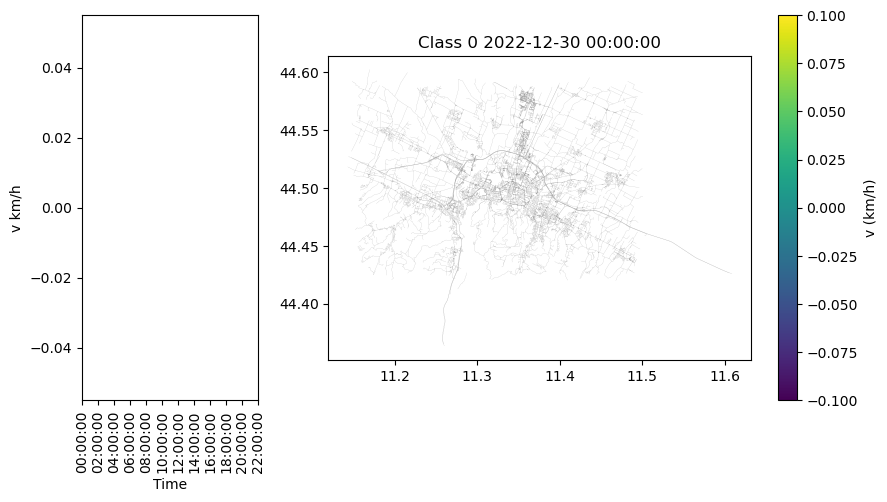

In [1]:

from collections import defaultdict

import datetime
import geopandas as gpd 
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation, FFMpegWriter

import numpy as np

import os

def GetInfoFrameEvolutionSpeed(gdf):
    """
        @param gdf: GeoDataFrame with the traffic information
        @return x_label: Label of the x-axis
        @return y_label: Label of the y-axis
        @return time2column: Dict with the time (str) and the column ["new_class_Speed_" + Day + "_" + str(timestamp)]
    """
    x_label = "time"
    y_label = "v (km/h)"
    timestamps = []
    time2column = defaultdict()
    for Col in gdf.columns:
        if "new_class" in Col:
            Day = Col.split("_")[-2]
            timestamp = int(Col.split("_")[-1])
            timestamps.append(timestamp)
    timestamps = np.sort(timestamps)
    for timestamp in timestamps:
        t_hour = datetime.datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d %H:%M:%S').split(" ")[1]
        time2column[str(t_hour)] = "new_class_Speed_" + Day + "_" + str(timestamp)
    return x_label,y_label,time2column,Day

def GetClass2TimeSpeed(gdf,time2column,Day):
    Class2TimeSpeed = defaultdict()
    for Class, gdfClass in gdf.groupby("IntClassOrdered_"+Day): 
        if Class not in Class2TimeSpeed.keys():
            Class2TimeSpeed[Class] = {"time":[],"speed":[]}
        for time_h,col in time2column.items():
            Class2TimeSpeed[Class]["time"].append(time_h)
            Class2TimeSpeed[Class]["speed"].append(gdfClass[col].mean())
    return Class2TimeSpeed

def AnimateEvolutionTraffic(FrameN, gdfClass, Time, Speed, Columns, TimeKey, ax_geo,Class,Day,linewidth_col=0.5, cmap='inferno'):
    """
        @param gdfClass: GeoDataFrame with the Class
        @param Class2TimeSpeed: Dict with the time and speed of the class
        @param FrameN: Frame Number
        @param linewidth_col: Linewidth of the column (set the width of the street with traffic)
    """
    print("FrameN: ",FrameN)
    print("TimeKey: ",TimeKey)
    print("Time: ",Time)
    print("Speed: ",Speed)  
    print("Columns: ",Columns)
    print("ax_geo: ",ax_geo)
    print("Class: ",Class)
    print("Day: ",Day)

    Column = Columns[FrameN]
#    Column = Time2Column[TimeKey]
    for coll in ax_geo.collections[1:]:
        coll.remove()
    # Extract Column To Plot
    line.set_xdata(Time[:FrameN])
    line.set_ydata(Speed[:FrameN])    
    # Geo
    GeoPlt = gdf.plot(color='gray', linewidth=linewidth, ax=ax_geo,alpha = 0.8)
    gdfClass.plot(column=Column, linewidth=linewidth_col, ax=ax_geo,alpha = 1)
    ax_geo.set_title(f"Class {Class} {Day} {TimeKey}")    
    FrameN += 1
    return ax_geo.collections

def EvolutionRoadSpeed(PlotDir,Day):
    cmap = "viridis"
    gdf = gpd.read_file(os.path.join(PlotDir,f"GeoJson_{Day}.geojson"))
    x_label,y_label,Time2Column,_ = GetInfoFrameEvolutionSpeed(gdf)
    Class2TimeSpeed = GetClass2TimeSpeed(gdf,Time2Column,Day)
    for Class, gdfClass in gdf.groupby(f"IntClassOrdered_{Day}"):
        FrameN = 0
        fig, (ax_curve,ax_geo) = plt.subplots(1,2,figsize=(10,5),width_ratios=[1,3])
        # Global Variables
        Time = Class2TimeSpeed[Class]["time"]
        Columns = list(Time2Column.values())
        # BaseMap
        line = ax_curve.plot(Time[0], np.mean(gdfClass[Columns[0]]))[0]
        ax_curve.set_xticks(range(len(Time))[::8])
        ax_curve.set_xticklabels(Time[::8], rotation=90)  # Set the labels with rotation    ax.set_title("Time Percorrence Distribution")
        ax_curve.set(xlabel='Time', ylabel='v km/h')

        # Base Geo-Map
        linewidth = 0.1
        GeoPlt = gdf.plot(color='gray', linewidth=linewidth, ax=ax_geo,alpha = 0.8)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=gdfClass[Columns[0]].min(), vmax=gdfClass[Columns[0]].max()))
        sm._A = []  # Dummy array for the ScalarMappable
        cbar = fig.colorbar(sm, ax=ax_geo)
        cbar.set_label(y_label)    
        # ANIMATION
        NumberFrames = np.arange(len(list(Time2Column.keys())))
        TimeSpeed = Class2TimeSpeed[Class]
        Time2Column = dict(Time2Column)
        TimeKey = list(Time2Column.keys())[FrameN] 
        Columns = list(Time2Column.values())
        # List Time
        Time = list(TimeSpeed["time"])
        # List Speed
        Speed = list(TimeSpeed["speed"])
        ax_geo.set_title(f"Class {Class} {Day} {TimeKey}")
        # call the animator.  blit=True means only re-draw the parts that have changed.
        anim = animation.FuncAnimation(fig, AnimateEvolutionTraffic, NumberFrames, fargs=(FrameN, gdfClass, Time, Speed, Columns, TimeKey, ax_geo,Class,Day),
                                    interval=100, blit=True, repeat=False)
        writer = FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)
        output_path = os.path.join(PlotDir, f'Class_{Class}_{Day}.mp4')
        anim.save(output_path, writer=writer, dpi=200)
        anim.save(os.path.join(PlotDir,f'Class_{Class}_{Day}.mp4'), dpi=200)
        plt.close()
for Day in ["2022-12-30","2022-12-31","2023-01-01","2022-11-11","2022-07-01","2022-08-05","2022-01-31","2023-03-18"]:
    EvolutionRoadSpeed(f"/home/aamad/codice/city-pro/output/bologna_mdt/plots/{Day}/",Day)

NameError: name 'v0' is not defined

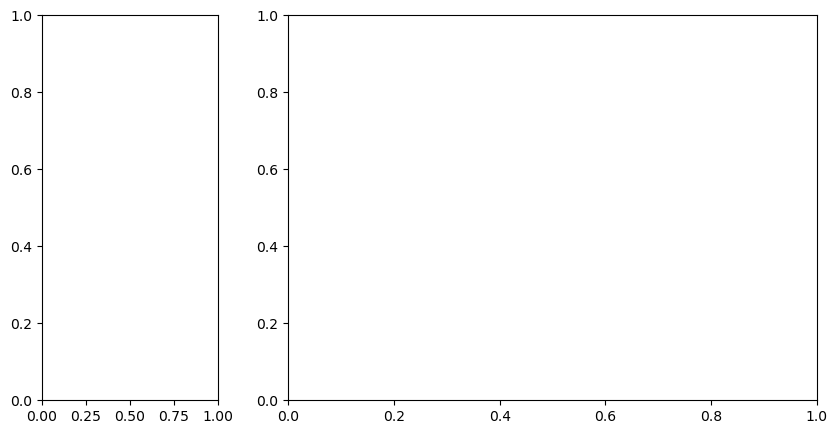

In [52]:
import datetime
def GetInfoFrameEvolutionSpeed(gdf):
    x_label = "time"
    y_label = "v (km/h)"
    time_vector = []
    timestamps = []
    time2column = defaultdict()
    for Col in gdf.columns:
        if "new_class" in Col:
            Day = Col.split("_")[-2]
            timestamp = int(Col.split("_")[-1])
            timestamps.append(timestamp)
    timestamps = np.sort(timestamps)
    for timestamp in timestamps:
        t_hour = datetime.datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d %H:%M:%S').split(" ")[1]
        time2column[str(t_hour)] = "new_class_Speed_" + Day + "_" + str(timestamp)
    return x_label,y_label,time2column,Day

def GetClass2TimeSpeed(gdf,time2column,Day):
    Class2TimeSpeed = defaultdict()
    for Class, gdfClass in gdf.groupby("IntClassOrdered_"+Day) 
        if Class not in Class2TimeSpeed.keys():
            Class2TimeSpeed[Class] = {"time":[],"speed":[]}
        for time_h,col in time2column.items():
            Class2TimeSpeed[Class]["time"].append(time_h)
            Class2TimeSpeed[Class]["speed"].append(gdfClass[col].mean())
    return Class2TimeSpeed


x_label,y_label,time2column,Day = GetInfoFrameEvolutionSpeed(gdf)
Class2TimeSpeed = GetClass2TimeSpeed(gdf,time2column,Day)
for Class, gdfClass in gdf.groupby("IntClassOrdered_"+Day):
    fig, (ax_curve,ax_geo) = plt.subplots(1,2,figsize=(10,5),width_ratios=[1,3])
    line = ax_curve.plot(time_vector, gdfClass[Columns[0]])
    line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
    ax.set_xticks(range(len(time_vector))[::8])
    ax.set_xticklabels(time_vector[::8], rotation=90)  # Set the labels with rotation    ax.set_title("Time Percorrence Distribution")
    ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
    ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)

In [25]:
ax.get_children()[-1].__dict__

{'_stale': False,
 'stale_callback': None,
 '_axes': None,
 'figure': <Figure size 1000x1000 with 1 Axes>,
 '_transform': <matplotlib.transforms.BboxTransformTo at 0x7f906cbbec00>,
 '_transformSet': True,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x7f906cbe6e10>,
 '_remove_method': None,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_hatch_color': (0.0, 0.0, 0.0, 0.0),
 '_fill': True,
 '_original_edgecolor': 'none',
 '_edgecolor': (0.0, 0.0, 0.0, 0.0),
 '_original_facecolor': 'white',
 '_facecolor': (1.0, 1.0, 1.0, 1.0),
 '_linewidth': 0.0,
 '_unscaled_dash_pattern': (0, None),
 '_dash_pattern': (0, None),
 '_linestyle': 'solid',
 '_antialiased': True,
 '_hatch': No